##  Idea of Gaussian Mixture Clustering
Creating an algorithm of Main EM loop only by basic math functions.

And impeteing it to cluster a simple dataset.

In [31]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import paired_distances
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib inline

# import dataset 
two_gaussian = np.loadtxt("/Users/jenny/datasets/2gaussian.txt")

## 1. Overview Dataset

First, I use Seaborn, a Visualization Library based on matplotlib, to overview samples distribution. 

The the blue curve in below plot shows samples would be covered by 2 gaussian distributions. 

Therefore, Gaussian Mixture seems a good choice to analysis it. 
I'm going to code a basic EM loop to optimaize mean，covariance matrix for the two Gaussian Distribution. 
till the error, or say liklelihood, is under a threshold. 
 

(<matplotlib.axes._subplots.AxesSubplot at 0x127ee35f8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x127ee35f8>)

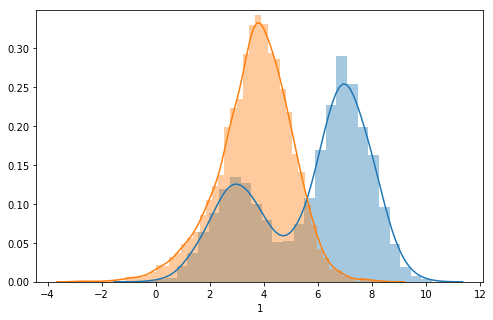

In [28]:
dataset= pd.DataFrame(two_gaussian)
plt.figure(1, figsize=(8,5))
sns.distplot(dataset[0],label="X"), sns.distplot(dataset[1], label="")

## 2. EM Loop

In [16]:
def eucl_dist(a,b):
    return euclidean_distances(a, b)

def eucl_dist_pair(a, b):
     return paired_distances(a, b)

def GaussianMixture_2D (dataset, mean_1, mean_2, cov_1, cov_2, mix_1, mix_2, threshold):
    iteration = 0
    num_samples, num_features = dataset.shape
    
    likelihood = sum(paired_distances(np.stack((mean_1, mean_2)), np.zeros((2,2))))
    
    while likelihood > threshold:
        
        left = (stats.multivariate_normal.pdf(dataset, mean = mean_1, cov = cov_1 ))*mix_1
        right = (stats.multivariate_normal.pdf(dataset, mean = mean_2, cov = cov_2))*mix_2
        pai_left = left/(sum(left)+sum(right))
        pai_right = right/(sum(left)+sum(right))
        pai_all = np.stack((left, right), axis=1)

        # M step
        cluster_1_idx = []
        cluster_2_idx = []
        for i in range (0, num_samples):
            if pai_all[i][0] >= pai_all[i][1]:
                cluster_1_idx.append(i)
            else:
                cluster_2_idx.append(i)

        cluster_1 = dataset[cluster_1_idx]
        cluster_2 = dataset[cluster_2_idx]

        new_mix_1 = len(cluster_1_idx)/num_samples
        new_mix_2 = len(cluster_2_idx)/num_samples

        new_mean_1 = np.sum(cluster_1, axis=0)/len(cluster_1)
        new_mean_2 = np.sum(cluster_2, axis=0)/len(cluster_2)
        new_cov_1 = np.cov(cluster_1, rowvar=False)
        new_cov_2 = np.cov(cluster_2, rowvar=False)

        iteration += 1
        likelihood = sum(paired_distances(np.stack((mean_1, mean_2)), np.stack((new_mean_1, new_mean_2))))

        mean_1 = new_mean_1
        mean_2 = new_mean_2
        cov_1 = new_cov_1
        cov_2 = new_cov_2
        mix_1 = new_mix_1
        mix_2 = new_mix_2

    print("Iteration Number:", iteration)
    print("Likelihood:", likelihood, "\n")
    print("New mean of Clutster 1:", new_mean_1)  
    print("New mean of Clutster 2:", new_mean_2)
    print("New cov of cluster 1:", new_cov_1)
    print("New Cov of Cluster 2:", new_cov_2)

    return cluster_1, cluster_2, mean_1, mean_2, cov_1, cov_2

## 3. Implement Algo

In [17]:
# two_gaussian
mean1 = np.array([3,3])
mean2 = np.array([7,4])

cov1 = np.array([[1,0],[0,3]])
cov2 = np.array([[1,0.5],[0.5,1]])

mix1= 0.5
mix2= 1-mix1
threshold = 0.01

first_cluster, second_cluster, mean_1, mean_2, cov_1, cov_2 = GaussianMixture_2D(two_gaussian, mean1, mean2, cov1, cov2, mix1, mix2, threshold)

Iteration Number: 5
Likelihood: 0.0047161102105082245 

New mean of Clutster 1: [2.9457854  3.04268656]
New mean of Clutster 2: [7.00617308 3.9806381 ]
New cov of cluster 1: [[0.89630661 0.01321781]
 [0.01321781 2.97414687]]
New Cov of Cluster 2: [[0.9627988  0.48852263]
 [0.48852263 0.99705019]]


## 4. visualize Clusters

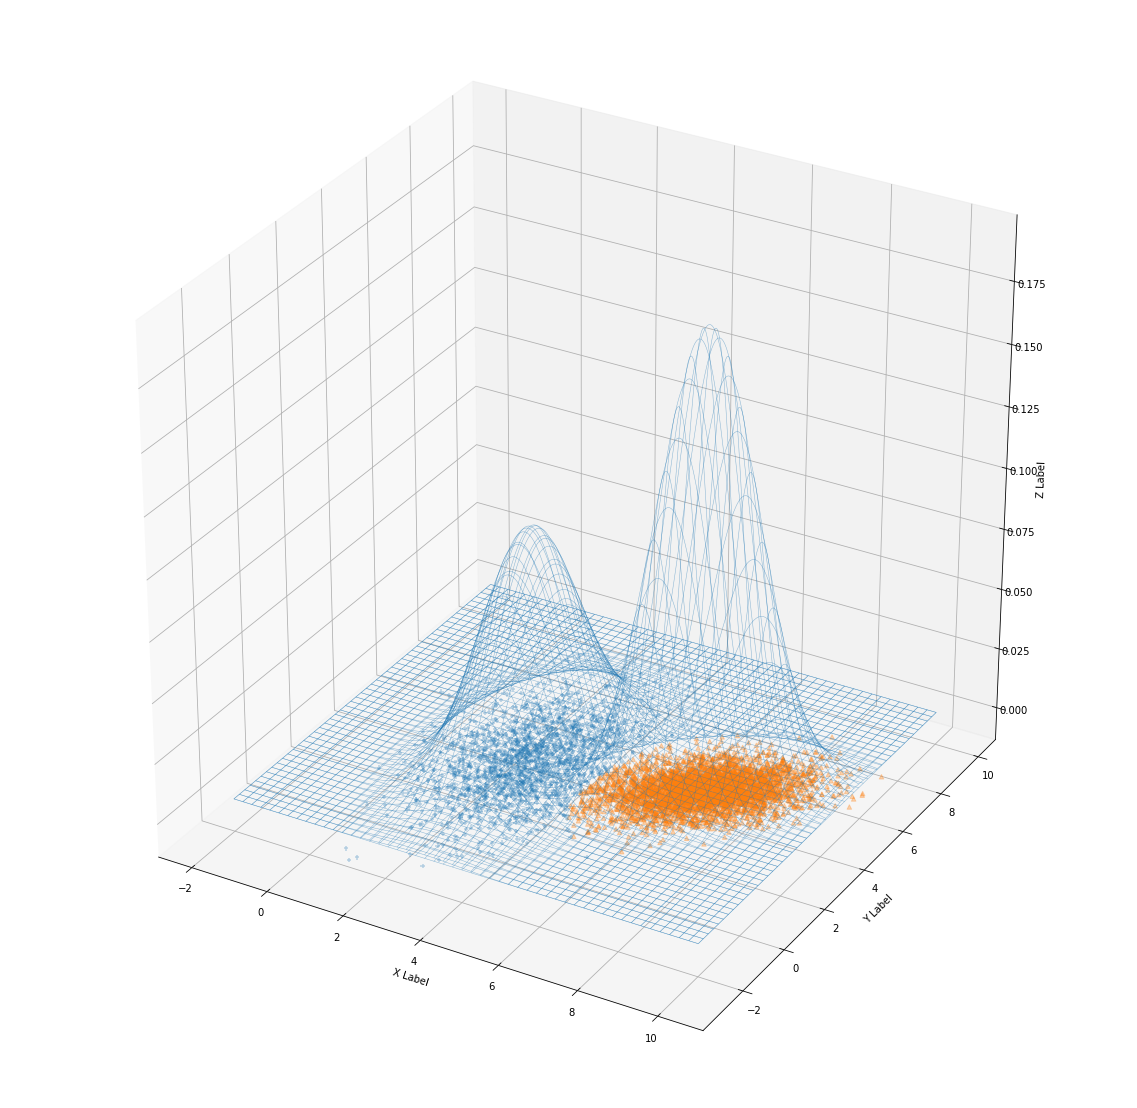

In [18]:
# 3D space
# create grid
x = np.linspace(-2, 10, 3000)
y = np.linspace(-2, 10, 3000)
X, Y= np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv_1 = stats.multivariate_normal(mean1, cov_1)
rv_2 = stats.multivariate_normal(mean_2, cov_2)

#create a 3D plot
fig = plt.figure(1, figsize=(20, 20))
ax = fig.gca(projection='3d')
ax.plot_wireframe(X, Y, rv_1.pdf(pos),linewidth=0.5, alpha=0.5)
ax.plot_wireframe(X, Y, rv_2.pdf(pos),linewidth=0.5, alpha=0.5)
ax.scatter(first_cluster[:,0],first_cluster[:,1], marker ="+", alpha =0.3)
ax.scatter(second_cluster[:,0],second_cluster[:,1], marker="^", alpha =0.3)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()